In [1]:
%load_ext autoreload
%autoreload 2
    
from manager import * 
import rosnode
import time
from env_utils.algo_constants import *


In [2]:
if '/manager' in rosnode.get_node_names():
    # print("Manager is running")
    rosnode.kill_nodes(['manager'])
    time.sleep(1)

m = Manager(skip_checks=True, 
            debug_flag=True, 
            fake_hardware_flags=[FAKE_ARM, FAKE_PXRF, FAKE_MOVE_BASE])
# m.fake_pxrf_values = [0.13, 0.2, 0.0, 0.5, 0.6, 0.05]
# m.fake_pxrf_values = [0.4, 0.2, 0.3, 0, 0.02, 0.5, 0.32, 0.0, 0.6, 0.0, 0.1, 0.0]

# NREC Field Test (Sep 13)
m.fake_pxrf_values = [0.0, 0.0, 0.0, 0.0, 
                      0.0, 0.0, 0.0, 0.0, 
                      0.0, 990, 280, 1532, 
                      0.0, 0.0, 2370, 0.0, 
                      0.0, 0.0]


[INFO] [1726252003.815053]:  < Status: Initialization > 
[INFO] [1726252003.847520]:  < Status: Ready > 
[INFO] [1726252003.848641]:  | Algorithm Set to ADAPTIVE with number of samples = 16
[INFO] [1726252003.848991]:  ----------- READY ----------- 


[WARN] [1726252003.847893]: >>> USING FAKE HARDWARE <<<<
[WARN] [1726252003.848310]: Fake Hardware Flags: ['fake_arm', 'fake_pxrf', 'fake_move_base']


header: 
  seq: 2
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
status: 
  status: 0
  service: 0
latitude: 40.47219969363796
longitude: -79.96628216486742
altitude: 0.0
position_covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
position_covariance_type: 0


Samples: 16/16
[INFO] [1726251712.510574]: ----------- Manager Loop: adaptive -----------
[INFO] [1726251712.511387]:  < Status: Navigating to scan loc > 
[INFO] [1726251712.512604]:  < Status: Arrived at scan loc > 
[INFO] [1726251712.513773]: ----------- Manager Loop END -----------
[INFO] [1726251712.515479]: ----------- Manager Loop: adaptive -----------
[INFO] [1726251712.516448]: PXRF Mean Value: 0.0
[INFO] [1726251712.517407]:  < Status: Arm returned > 
[INFO] [1726251712.518344]: ----------- Manager Loop END -----------
[INFO] [1726251712.519861]: ----------- Manager Loop: adaptive -----------
[INFO] [1726251712.520798]:  < Status: Running search algo > 
[INFO] [1726251712.585067]:  | Updating GPR with value=0.0 at (GPS|Map|Grid): (40.47220232141441, -79.9663033644222) | (0.0, 4.1469402918592095) | (0, 15) 


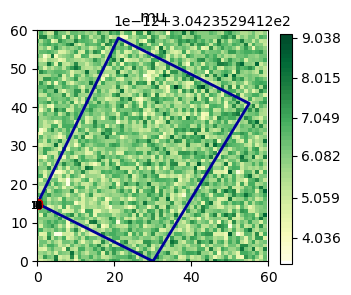

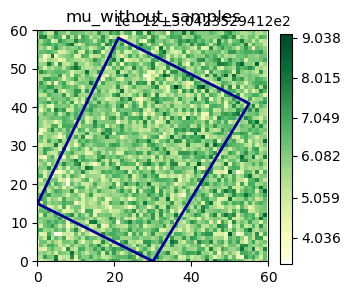

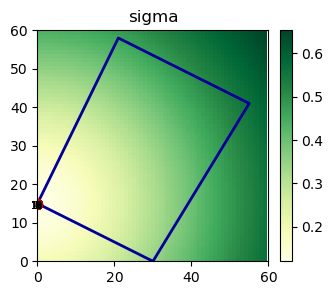

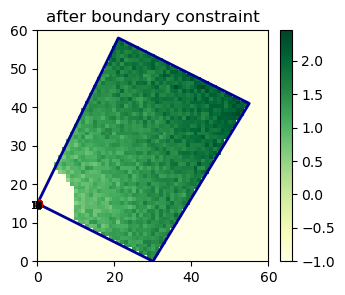

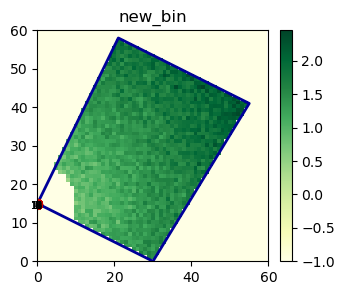

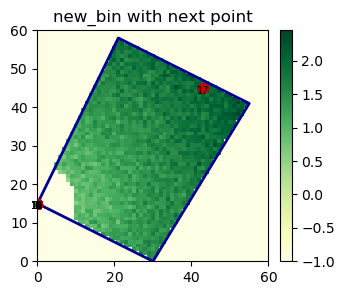

---------
[INFO] [1726251713.397725]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.47226628154446, -79.9661740966728) | (10.875, 11.375) | [43, 45] 
[INFO] [1726251713.458674]:  < Status: Received next scan loc > 
[INFO] [1726251713.461513]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=100)
Received next scan loc


In [18]:
if (m.status != SCANNING and
    m.status != ERROR):
    print(f'Samples: {m.adaptiveROS.path_len+1}/{m.adaptiveROS.total_number}')
    while (m.status != ARM_RETURNED):
            m.run_once()
    m.run_once()
    print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')

print(m.status)

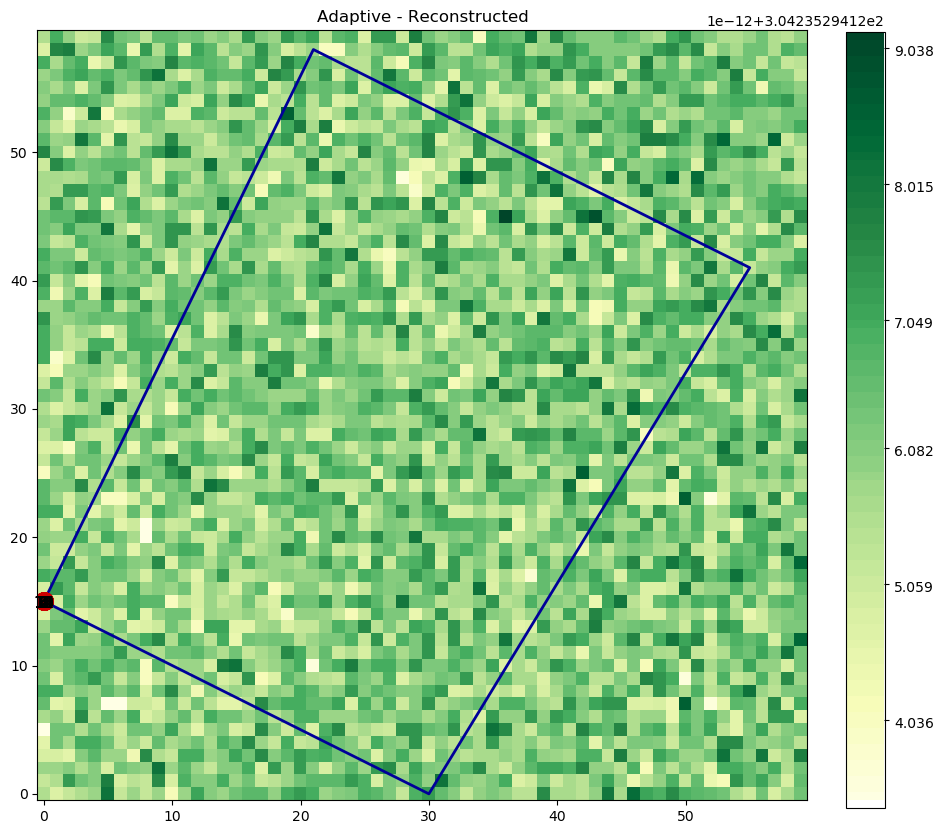

[INFO] [1726251721.266879]: Sampled at [0, 15] with value = 0.0
[INFO] [1726251721.268237]: Adaptive Norm Range: 2370.0000


In [19]:
m.show()

In [ ]:
for i in range(0,4):
    if (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()

In [ ]:
m.show()

In [ ]:
m.adaptiveROS.predict(True)

In [ ]:
sampled = [[m.adaptiveROS.sampled[0][1], m.adaptiveROS.sampled[0][0]]]
# sampled = m.adaptiveROS.sampled
print(sampled)
m.adaptiveROS.gp.fit(sampled, 
                     m.adaptiveROS.sampled_val) #todo: Should we re-init self.gp?

nextScanLoc = m.adaptiveROS.predict(True)

In [ ]:
nav_goal_map = m.conversion.grid2map(nextScanLoc[0], nextScanLoc[1])
nav_goal_gps = m.conversion.map2gps(nav_goal_map[0], nav_goal_map[1])
        
m.send_location_to_GUI(nav_goal_gps[0], nav_goal_gps[1])

In [ ]:
m.show()

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
m.show()

In [ ]:
m.adaptiveROS.predict(True)